<a href="https://colab.research.google.com/github/Juandp624/Juandp624/blob/main/FINAL_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business Case

New York City, USA. March 15, 2016.

A number of at risk individuals and infants have fallen unexpectedly ill in the City of New York.  Desperate for answers, the city´s local government has saught the help of Aquasafe Analytics, a pioneering startup based in New York City. The company is dedicated to revolutionizing how water quality is monitored and maintained in urban environments. Their mission is to safeguard public health and environmental sustainability by providing innovative solutions for detecting and mitigating contaminants in drinking water.

In response to the urgent situation in New York City, Aquasafe Analytics can provide critical assistance to help identify and address the root cause of the sudden illnesses that plagues at risk individuals and infants. Ultimately, helping to protect public health and prevent further spread of the unknown disease.

As Aquasafe, our goals are to:

- 1 Identify if the issue lies in the water system.
- 2 Identify what pathogen(s) are infecting the water system


#Drinking Water Quality Distribution Monitoring Data

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Drinking_Water_Quality_Distribution_Monitoring_Data_20240219.csv')

<ipython-input-4-5b392dc712f1>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Drinking_Water_Quality_Distribution_Monitoring_Data_20240219.csv')


In [ ]:
df.head(10)

,Sample Number,Sample Date,Sample Time,Sample Site,Sample class,Residual Free Chlorine (mg/L),Turbidity (NTU),Fluoride (mg/L),Coliform (Quanti-Tray) (MPN /100mL),E.coli(Quanti-Tray) (MPN/100mL)
0,201655703,08/09/2016,10:31,43250,Compliance,0.68,0.74,NaN,<1,<1
1,201655704,08/09/2016,11:27,46850,Compliance,0.81,1.45,NaN,<1,<1
2,201655705,08/09/2016,10:14,50200,Operational,0.79,0.74,NaN,<1,<1
3,201655706,08/09/2016,12:12,50300,Operational,0.92,0.63,NaN,<1,<1
4,201655707,08/09/2016,10:17,76550,Compliance,0.06,0.6,NaN,<1,<1
5,201655708,08/09/2016,09:43,79450,Compliance,0.13,0.75,NaN,<1,<1
6,201655797,08/10/2016,10:39,1S07,Operational,0.77,0.83,0.25,<1,<1
7,201655798,08/10/2016,11:09,1S03A,Operational,1.01,0.91,0.06,<1,<1
8,201655799,08/10/2016,11:45,1S03B,Operational,0.84,0.73,0.21,<1,<1
9,201655800,08/10/2016,11:26,1SCL1,Operational,0.93,0.15,0.67,<1,<1


#Understanding the data

Before we analyze or create any kind of models with our data, it is imperative that we understand the features in the dataset and their importance given the context of our bussiness case.

- Residual Free Chlorine: **Optimal levels 0.5 - 0.6.**

Residual free chlorine refers to the remaining chlorine in water after disinfection.

Importance: Chlorine acts as a disinfectant that kills harmful microorganisms. Adequate residual chlorine ensures that water remains safe for consumption by preventing bacterial growth.

Health Impact: Low residual chlorine may lead to microbial contamination, while excessive levels can cause taste and odor issues. Optimal levels fall under 0.5 - 0.6.

- Turbidity: **Optimal levels < 0.3**

Turbidity measures water cloudiness caused by suspended particles.

Importance: High turbidity can indicate the presence of pathogens (viruses, parasites, bacteria) that may cause waterborne diseases.

Health Impact: Elevated turbidity levels correlate with gastrointestinal symptoms such as nausea, cramps, and diarrhea.


- Fluoride:**Optimal level 0.7 Mg/L**
Fluoride is a naturally occurring mineral added to water, usually for dental health.

Importance: Optimal fluoride levels prevent tooth decay.

Health Impact: Too little fluoride may lead to dental problems, while excessive levels can cause fluorosis (discoloration of teeth).


- Coliform:**Optimal level < 1 MPN/100ml**
Coliform bacteria serve as indicators of water quality.

Importance: Their presence suggests potential contamination by fecal matter.

Health Impact: While coliforms themselves are not harmful, their presence indicates a risk of other harmful bacteria.


- E. coli (Escherichia coli):**Optimal level < 1 MPN/100ml**

E. coli is a specific type of coliform bacteria.

Importance: Its presence indicates recent fecal contamination.
Health Impact: E. coli can cause gastrointestinal illnesses.




#Understanding our Units

- mg/L (milligrams per liter):

 This unit measures the concentration of a substance in water.

- NTU (Nephelometric Turbidity Unit):

Nephelometric: A means of measuring turbidity in a water sample utilizing a nephelometer.

NTU is a unit used to measure the turbidity or cloudiness of water caused by suspended particles.

- Quanti-Tray (MPN/100mL):

Quanti-Tray is a method used for detecting and quantifying the presence of coliform bacteria in water samples. MPN stands for Most Probable Number, and it represents the concentration of coliform bacteria per 100 milliliters of water.

#Transform necessary values

In [ ]:
df.dtypes

Sample Number                            int64
Sample Date                             object
Sample Time                             object
Sample Site                             object
Sample class                            object
Residual Free Chlorine (mg/L)          float64
Turbidity (NTU)                         object
Fluoride (mg/L)                         object
Coliform (Quanti-Tray) (MPN /100mL)     object
E.coli(Quanti-Tray) (MPN/100mL)         object
dtype: object

Turbidity (NTU)    
Fluoride (mg/L)                         
Coliform (Quanti-Tray) (MPN /100mL)     

All of these values need to be transformed to floats for our analysis.

In [ ]:
import pandas as pd

# Convert specified columns to float
columns_to_convert = ['Turbidity (NTU)', 'Fluoride (mg/L)', 'Coliform (Quanti-Tray) (MPN /100mL)', 'E.coli(Quanti-Tray) (MPN/100mL)']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the DataFrame after conversion
print("DataFrame after converting specified columns to float:")
print(df)


DataFrame after converting specified columns to float:
        Sample Number Sample Date Sample Time Sample Site Sample class  \
0           201655703  08/09/2016       10:31       43250   Compliance   
1           201655704  08/09/2016       11:27       46850   Compliance   
2           201655705  08/09/2016       10:14       50200  Operational   
3           201655706  08/09/2016       12:12       50300  Operational   
4           201655707  08/09/2016       10:17       76550   Compliance   
...               ...         ...         ...         ...          ...   
138911      202120165  06/30/2021       08:25       22950   Compliance   
138912      202120166  06/30/2021       09:07       27000  Operational   
138913      202120167  06/30/2021       09:28       27750   Compliance   
138914      202120168  06/30/2021       11:19       40200  Operational   
138915      202120169  06/30/2021       10:56       40750   Compliance   

        Residual Free Chlorine (mg/L)  Turbidity (NTU)  

In [ ]:
df.dtypes

Sample Number                            int64
Sample Date                             object
Sample Time                             object
Sample Site                             object
Sample class                            object
Residual Free Chlorine (mg/L)          float64
Turbidity (NTU)                        float64
Fluoride (mg/L)                        float64
Coliform (Quanti-Tray) (MPN /100mL)    float64
E.coli(Quanti-Tray) (MPN/100mL)        float64
dtype: object

Desired Values successfully transformed.

#Data Cleaning

#MIssing Values

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Sample Number                               0
Sample Date                                 0
Sample Time                                 0
Sample Site                                 3
Sample class                                0
Residual Free Chlorine (mg/L)              49
Turbidity (NTU)                           882
Fluoride (mg/L)                        120620
Coliform (Quanti-Tray) (MPN /100mL)    138318
E.coli(Quanti-Tray) (MPN/100mL)        138909
dtype: int64


In [ ]:



total_entries = df.shape[0] * df.shape[1]

# Calculate the total number of missing values
total_missing_values = missing_values.sum()

# Calculate the percentage of missing values
percentage_missing = (total_missing_values / total_entries) * 100

print("Percentage of missing values in the dataset: {:.2f}%".format(percentage_missing))


Percentage of missing values in the dataset: 28.71%


In [ ]:

columns_of_interest = ['Fluoride (mg/L)', 'Coliform (Quanti-Tray) (MPN /100mL)', 'E.coli(Quanti-Tray) (MPN/100mL)']

# Calculate the total number of entries in each column
total_entries_per_column = df.shape[0]

# Calculate the number of missing values for each column
missing_values_per_column = df[columns_of_interest].isnull().sum()

# Calculate the percentage of missing values for each column
percentage_missing_per_column = (missing_values_per_column / total_entries_per_column) * 100

# Print the percentage of missing values for each column
print("Percentage of missing values:")
for column in columns_of_interest:
    print("{}: {:.2f}%".format(column, percentage_missing_per_column[column]))


Percentage of missing values:
Fluoride (mg/L): 86.83%
Coliform (Quanti-Tray) (MPN /100mL): 99.57%
E.coli(Quanti-Tray) (MPN/100mL): 99.99%


¨**4th Wall Break, adressing the integrity of the data for the purpose of the assignment**¨

The number of missing values for Fluoride, Coliform and E.Coli are **substantial**.
- 86.8% of the Fluoride collumn is missing
- 99.5% of the Coliform collumn is missing
- 99.99% of the E.Coli collumn is missing.

Amounting to about 29% of the entire dataset.

For the purpose of this assignament, this will dramatically hinder our ability to conduct an accurate analysis of the data and identify any potential issues within the water quality. Neverless, the most optimal course of action is to acknowledge this instance and impute all missing values.

¨**End of 4th Wall Break**¨

#Treatment Justification for Imputing all missing values:

When it comes to health and water safety regulations, any oversight can cause serious issues for the general public. Because of this, it is important that we mantain the integrity of the dataset to the best of our ability. We can do this by filling in missing or incomplete data values with estimated or calculated values rather than getting rid of the row completely. Seeing as how a substantial amount of our data is missing, I expect the distribution of a lot of the values to be mostly uniform after imputing. This is something that should be taken into consideration when discussing the conclusion of our analysis.

In [ ]:
import pandas as pd


# Impute missing values with the mean of each column
new_df= df.fillna(df.mean())

# Display the DataFrame after imputation
print("DataFrame after imputation:")
print(new_df)


DataFrame after imputation:
        Sample Number Sample Date Sample Time Sample Site Sample class  \
0           201655703  08/09/2016       10:31       43250   Compliance   
1           201655704  08/09/2016       11:27       46850   Compliance   
2           201655705  08/09/2016       10:14       50200  Operational   
3           201655706  08/09/2016       12:12       50300  Operational   
4           201655707  08/09/2016       10:17       76550   Compliance   
...               ...         ...         ...         ...          ...   
138911      202120165  06/30/2021       08:25       22950   Compliance   
138912      202120166  06/30/2021       09:07       27000  Operational   
138913      202120167  06/30/2021       09:28       27750   Compliance   
138914      202120168  06/30/2021       11:19       40200  Operational   
138915      202120169  06/30/2021       10:56       40750   Compliance   

        Residual Free Chlorine (mg/L)  Turbidity (NTU)  Fluoride (mg/L)  \
0       

<ipython-input-12-ac1ffad1f237>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df= df.fillna(df.mean())


In [ ]:
import pandas as pd


# Check for missing values after imputing
missing_values_after_imputation = new_df.isnull().sum()

print("Missing values in each column after imputation:")
print(missing_values_after_imputation)


Missing values in each column after imputation:
Sample Number                          0
Sample Date                            0
Sample Time                            0
Sample Site                            3
Sample class                           0
Residual Free Chlorine (mg/L)          0
Turbidity (NTU)                        0
Fluoride (mg/L)                        0
Coliform (Quanti-Tray) (MPN /100mL)    0
E.coli(Quanti-Tray) (MPN/100mL)        0
dtype: int64


Missing values have been imputed, 3 sample sites are still missing. However, for the purpose of our analysis this can be overlooked.

#Outliers

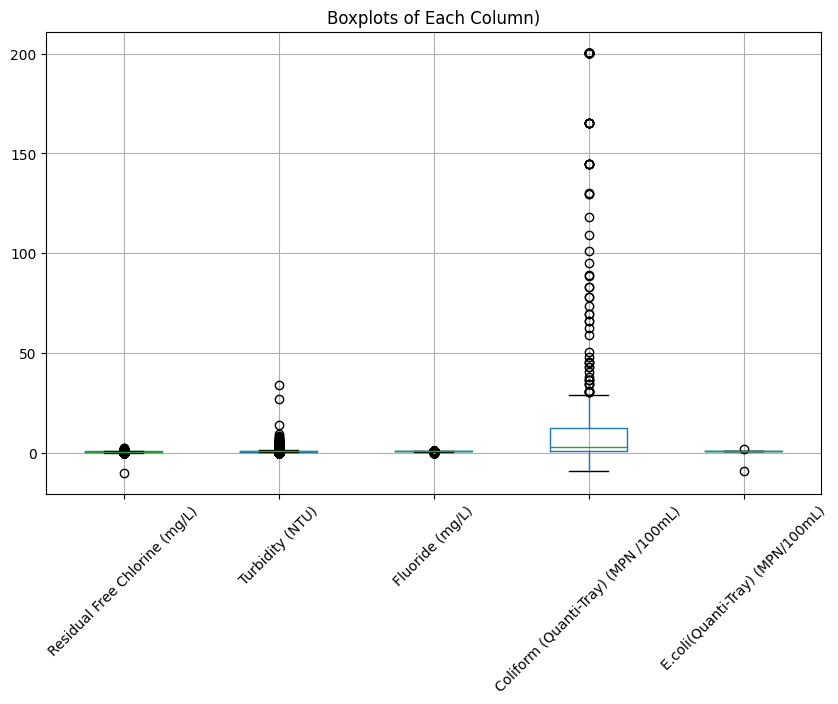

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Drop the 'Sample Number' column
new_df_no_samp = df.drop(columns=['Sample Number'])

# Create boxplots for all columns in the modified DataFrame
new_df_no_samp.boxplot(figsize=(10, 6))
plt.title("Boxplots of Each Column)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



Based on the boxplot above, there is an alarming high number of outliers for Coliform. While the presence of Coliform in it of itself is not necessarily harmful. Its presence in the water indicates potential fecal contamination and the possible presence of other harmful pathogens such as E. coli. This poses a direct health risk to humans if ingested.

However, E.coli levels seem to be within regulation (0 or below)

Further analysis is required to check the distribution of the Coliform values within the dataset. Low levels of E.Coli may indicate that there is another pathogen in the water. **Perhaps one that was not tested for in the dataset**.

#Descriptive Analytics

In [ ]:
# Calculate mean, median, mode, maximum, and minimum for specified columns
columns_to_calculate = ['Residual Free Chlorine (mg/L)', 'Turbidity (NTU)', 'Fluoride (mg/L)', 'Coliform (Quanti-Tray) (MPN /100mL)']

# Mean
mean_values = new_df[columns_to_calculate].mean()
print("Mean values:")
print(mean_values)

# Median
median_values = new_df[columns_to_calculate].median()
print("\nMedian values:")
print(median_values)

# Mode
mode_values = new_df[columns_to_calculate].mode().iloc[0]  # Mode may return multiple values, so we take the first one
print("\nMode values:")
print(mode_values)

# Maximum
max_values = new_df[columns_to_calculate].max()
print("\nMaximum values:")
print(max_values)

# Minimum
min_values = new_df[columns_to_calculate].min()
print("\nMinimum values:")
print(min_values)



Mean values:
Residual Free Chlorine (mg/L)           0.565408
Turbidity (NTU)                         0.731780
Fluoride (mg/L)                         0.708564
Coliform (Quanti-Tray) (MPN /100mL)    26.321906
dtype: float64

Median values:
Residual Free Chlorine (mg/L)           0.570000
Turbidity (NTU)                         0.730000
Fluoride (mg/L)                         0.708564
Coliform (Quanti-Tray) (MPN /100mL)    26.321906
dtype: float64

Mode values:
Residual Free Chlorine (mg/L)           0.620000
Turbidity (NTU)                         0.700000
Fluoride (mg/L)                         0.708564
Coliform (Quanti-Tray) (MPN /100mL)    26.321906
Name: 0, dtype: float64

Maximum values:
Residual Free Chlorine (mg/L)            2.20
Turbidity (NTU)                         33.80
Fluoride (mg/L)                          0.89
Coliform (Quanti-Tray) (MPN /100mL)    200.50
dtype: float64

Minimum values:
Residual Free Chlorine (mg/L)         -9.99
Turbidity (NTU)                       

#Interpreting Descriptive Analytics for Coliform.


- The average value of 26.3 MPN/100 mL indicates that the average level of coliform is well above the regulation range.

- A max value of 200.5 is substantially more severe.

It is important to remember that he maximum acceptable concentration (MAC) for total coliforms in drinking water is none detectable (0) per 100 mL.

**Side note** The mode and the mean for Coliform are the same due to the large number of missing values that were imputed using the average coliform levels.

#Histograms

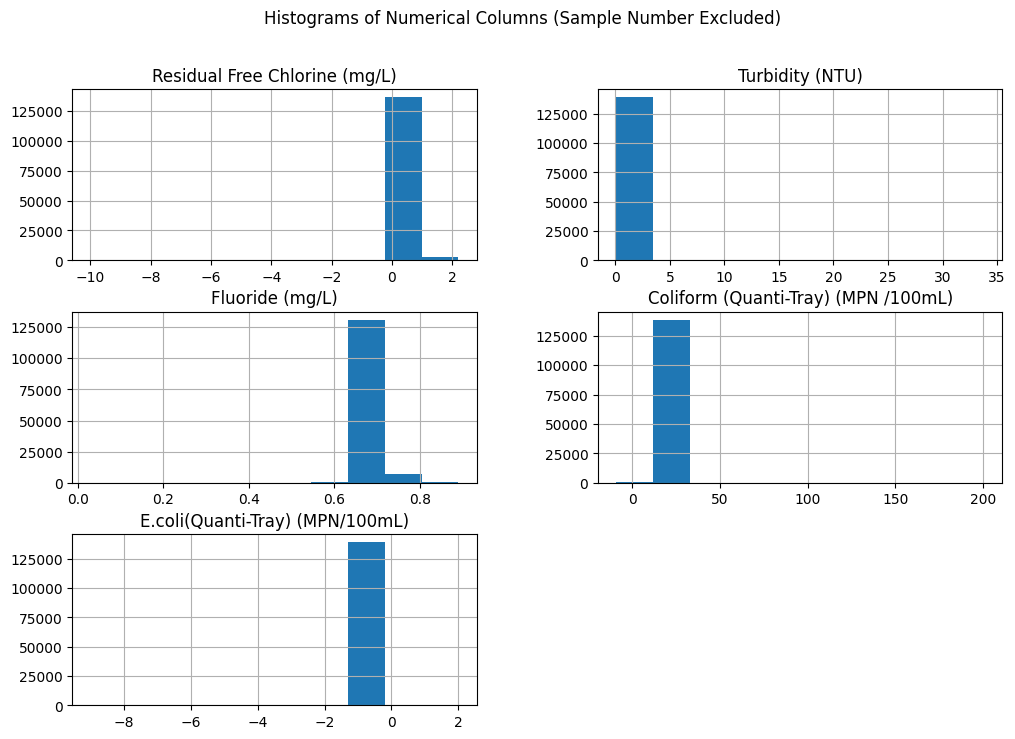

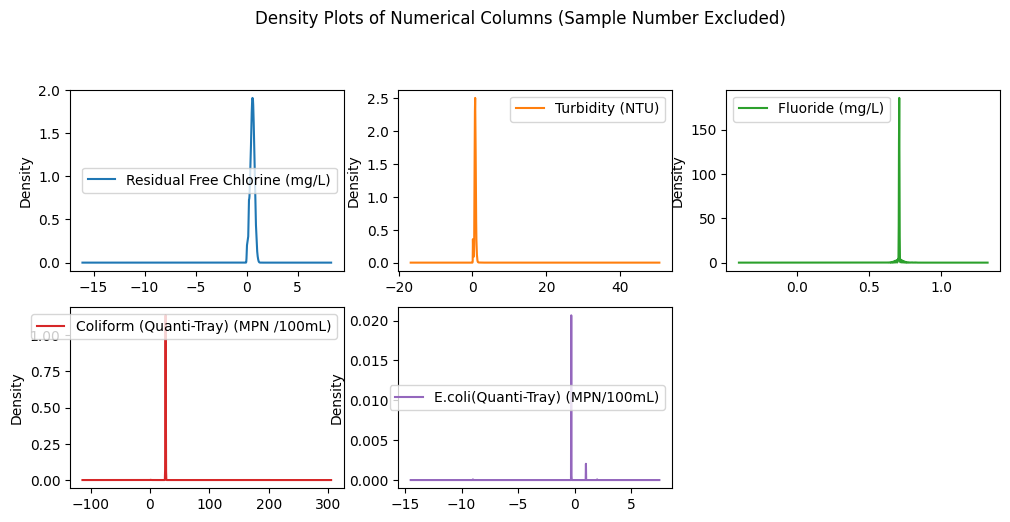

In [ ]:
import matplotlib.pyplot as plt

# Drop the 'Sample Number' column
new_df_no_sample = new_df.drop(columns=['Sample Number'])

# Histograms for each numerical column
new_df_no_sample.hist(figsize=(12, 8))
plt.suptitle('Histograms of Numerical Columns (Sample Number Excluded)')
plt.show()

# Density plots for each numerical column
new_df_no_sample.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(12, 8))
plt.suptitle('Density Plots of Numerical Columns (Sample Number Excluded)')
plt.show()


Based on the histograms and density plots above, it becomes even more clear that the Coliform levels are higher than they should be. All other values are within regulation levels.

#Bivariate Plot

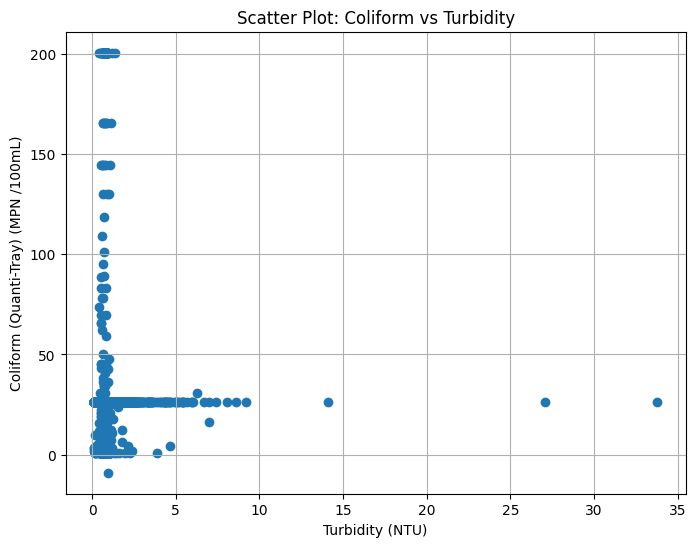

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(new_df_no_sample['Turbidity (NTU)'], new_df_no_sample['Coliform (Quanti-Tray) (MPN /100mL)'])
plt.title('Scatter Plot: Coliform vs Turbidity')
plt.xlabel('Turbidity (NTU)')
plt.ylabel('Coliform (Quanti-Tray) (MPN /100mL)')
plt.grid(True)
plt.show()


The majority of data points cluster in the lower left quadrant, indicating low turbidity and low Coliform levels.

- A few outliers exhibit higher turbidity while maintaining low Coliform levels.

Overall, there is no strong linear correlation between turbidity and Coliform levels. This indicates that turbidity alone does not predict Coliform contamination consistently.

Why does this matter?

It is important to acknowledge how the Water was perfectly clear at the max levels of Coliform. Making it more dangerous and unassuming. To the untrained eye (most people) clear water means clean water. According to this plot, this is not always the case.

#Multivariate plot

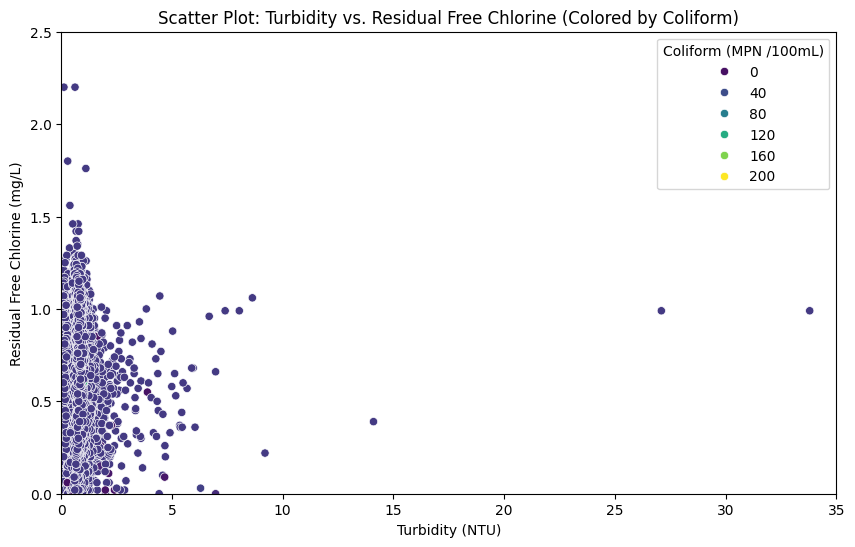

In [ ]:
import seaborn as sns

# Scatter plot with color by Coliform
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_df, x='Turbidity (NTU)', y='Residual Free Chlorine (mg/L)', hue='Coliform (Quanti-Tray) (MPN /100mL)', palette='viridis')
plt.title('Scatter Plot: Turbidity vs. Residual Free Chlorine (Colored by Coliform)')
plt.xlabel('Turbidity (NTU)')
plt.ylabel('Residual Free Chlorine (mg/L)')
plt.legend(title='Coliform (MPN /100mL)')

# Scale
plt.xlim(0, 35)
plt.ylim(0, 2.5)

plt.show()


The multivariate plot above depicts Turbidity vs Chlorine, colored by Coliform. The cluster at the bottom left portion of the plot is too dense to visualize any coliform points. In order to remedy this, a filter for Coliform levels above 40 can be implemented.  

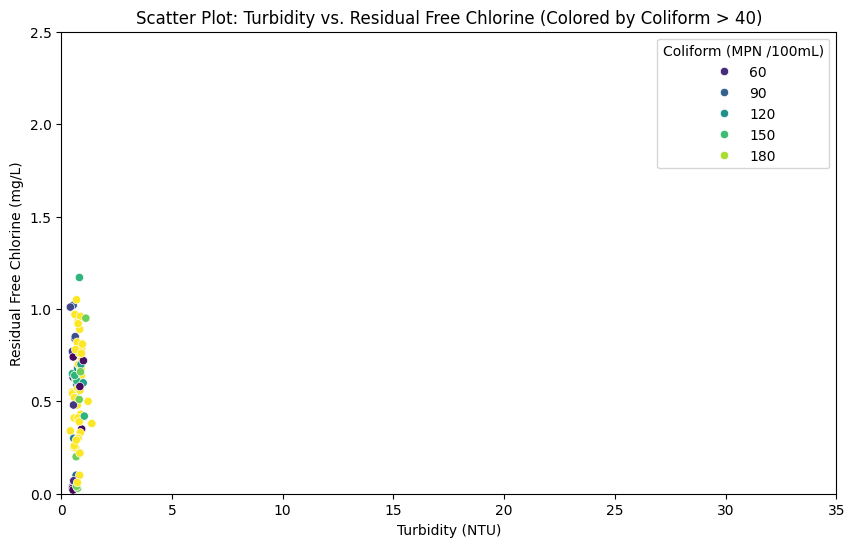

In [ ]:
import seaborn as sns

# Filter data for Coliform levels above 40
new_df_filtered = new_df[new_df['Coliform (Quanti-Tray) (MPN /100mL)'] > 40]

# Scatter plot with color by Coliform (filtered data)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_df_filtered, x='Turbidity (NTU)', y='Residual Free Chlorine (mg/L)', hue='Coliform (Quanti-Tray) (MPN /100mL)', palette='viridis')
plt.title('Scatter Plot: Turbidity vs. Residual Free Chlorine (Colored by Coliform > 40)')
plt.xlabel('Turbidity (NTU)')
plt.ylabel('Residual Free Chlorine (mg/L)')
plt.legend(title='Coliform (MPN /100mL)')

# Scale
plt.xlim(0, 35)
plt.ylim(0, 2.5)

plt.show()


After filtering for values with Coliform levels above 40, it becomes easy to see how there are coliform present even in low turbidity, high coliform quadrents.

**Why does this matter?**

This may indicate the the chlorine dissinfectant process is not effective in treating all of the water in the system. Basically, the disinfectant is not disinfecting propperly.

#Feature Selection

#PCA

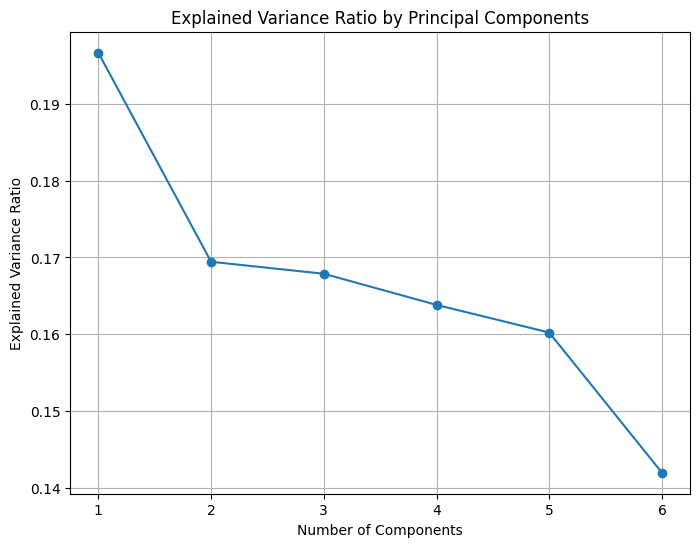

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns if any
numeric_df = new_df.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)

# Perform PCA
pca = PCA()
pca.fit(scaled_df)

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()



- Optimal Number of Components:

Based on the Skree Plot above, the optimal number of principal components identified is 1 to 2. This indicates that reducing the dimensionality of the dataset to just 1 or 2 principal components captures a relatively substantial portion of the variance present in our original dataset. In this case specifically, these 1 to 2 principal components collectively account for around 17% to 20% of the total variance.

It is important to note that, based on the plot, as the number of components increases beyond 2, the explained variance ratio for each additional component decreases. Implying that each additional component encompasses a smaller portion of the total variance in the dataset compared to the initial components (1-2).

However, there is a trade off.  While reducing the number of components can lead to simpler models and easier interpretation, selecting too few components may result in a loss of potential important information. On the other hand, selecting too many components may introduce noise or overfitting to the models.




#Baseline Reg, Dummy target: Turbidity

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select only the float-type columns for modeling
float_df = new_df.select_dtypes(include=['float64'])

# Split the data into features (X) and target variable (y)
X = float_df.drop(columns=['Turbidity (NTU)'])  # Features
y = float_df['Turbidity (NTU)']                # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict turbidity on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.05202428479032862


The Mean Squared Error (MSE) value of approximately 0.052 suggests that, on average, the squared difference between the predicted turbidity values and the actual turbidity values in the testing set is approximately 0.052. In the context of our data and our target variable (Turbidity), a value of 0.052 indicates relatively good predictive performance.

The performance of this model was unexpected as our prior analysis indicated that turbidity was not a good indicator for high values of contaminents or chemical presence in the water.

#Interaction Terms

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Select only the numeric columns for creating interaction terms
numeric_df = new_df.select_dtypes(include=['float64', 'int64'])

# Create PolynomialFeatures object for interaction terms up to degree 2
poly = PolynomialFeatures(degree=2, interaction_only=True)

# Generate interaction terms
interaction_terms = poly.fit_transform(numeric_df)

# Get the feature names from the transformed data
feature_names = poly.get_feature_names_out(numeric_df.columns)

# Convert the interaction terms array back to a DataFrame
interaction_df = pd.DataFrame(interaction_terms, columns=feature_names)

# Concatenate the interaction terms DataFrame with the original DataFrame
new_df_with_interactions = pd.concat([new_df, interaction_df], axis=1)

# Display the DataFrame with interaction terms
print("DataFrame with Interaction Terms:")
print(new_df_with_interactions)


DataFrame with Interaction Terms:
        Sample Number Sample Date Sample Time Sample Site Sample class  \
0           201655703  08/09/2016       10:31       43250   Compliance   
1           201655704  08/09/2016       11:27       46850   Compliance   
2           201655705  08/09/2016       10:14       50200  Operational   
3           201655706  08/09/2016       12:12       50300  Operational   
4           201655707  08/09/2016       10:17       76550   Compliance   
...               ...         ...         ...         ...          ...   
138911      202120165  06/30/2021       08:25       22950   Compliance   
138912      202120166  06/30/2021       09:07       27000  Operational   
138913      202120167  06/30/2021       09:28       27750   Compliance   
138914      202120168  06/30/2021       11:19       40200  Operational   
138915      202120169  06/30/2021       10:56       40750   Compliance   

        Residual Free Chlorine (mg/L)  Turbidity (NTU)  Fluoride (mg/L)  \
0 

#Regression + Int Terms


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Define the interaction terms
interaction_terms = [
    ['Residual Free Chlorine (mg/L)', 'Turbidity (NTU)', 'Fluoride (mg/L)'],
    ['Coliform (Quanti-Tray) (MPN /100mL)', 'E.coli(Quanti-Tray) (MPN/100mL)'],
    ['Residual Free Chlorine (mg/L)', 'Turbidity (NTU)'],
    ['Residual Free Chlorine (mg/L)', 'Fluoride (mg/L)'],
    ['Residual Free Chlorine (mg/L)', 'Coliform (Quanti-Tray) (MPN /100mL)'],
    ['Residual Free Chlorine (mg/L)', 'E.coli(Quanti-Tray) (MPN/100mL)'],
    ['Turbidity (NTU)', 'Fluoride (mg/L)'],
    ['Turbidity (NTU)', 'Coliform (Quanti-Tray) (MPN /100mL)'],
    ['Turbidity (NTU)', 'E.coli(Quanti-Tray) (MPN/100mL)'],
    ['Fluoride (mg/L)', 'Coliform (Quanti-Tray) (MPN /100mL)'],
    ['Fluoride (mg/L)', 'E.coli(Quanti-Tray) (MPN/100mL)']
]

# Initialize a dictionary to store MSE values for each interaction term
mse_dict = {}

# Loop through each interaction term and perform regression
for i, interaction in enumerate(interaction_terms):
    # Select the columns for modeling
    selected_columns = interaction + ['Turbidity (NTU)']
    selected_df = new_df[selected_columns]

    # Create interaction terms
    interaction_features = PolynomialFeatures(degree=1, interaction_only=True, include_bias=False)
    interaction_data = interaction_features.fit_transform(selected_df)
    interaction_columns = interaction_features.get_feature_names_out(selected_columns)

    # Convert the interaction terms array to a DataFrame
    interaction_df = pd.DataFrame(interaction_data, columns=interaction_columns)

    # Split the data into features (X) and target variable (y)
    X = interaction_df.drop(columns=['Turbidity (NTU)'])  # Features
    y = interaction_df['Turbidity (NTU)']                # Target variable

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict turbidity on the testing set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    mse_dict[i+1] = mse

# Sort the interaction terms by MSE in ascending order
sorted_interactions = sorted(mse_dict.items(), key=lambda x: x[1])

# Print the top 3 interaction terms with the lowest MSE
print("Top 3 Interaction Terms with the Lowest Mean Squared Error:")
for i, (interaction_idx, mse) in enumerate(sorted_interactions[:3]):
    interaction = interaction_terms[interaction_idx - 1]
    print(f"{i+1}. Interaction: {interaction}, MSE: {mse}")


Top 3 Interaction Terms with the Lowest Mean Squared Error:
1. Interaction: ['Residual Free Chlorine (mg/L)', 'Turbidity (NTU)', 'Fluoride (mg/L)'], MSE: 0.05202391383224849
2. Interaction: ['Residual Free Chlorine (mg/L)', 'Fluoride (mg/L)'], MSE: 0.052023913832248816
3. Interaction: ['Residual Free Chlorine (mg/L)', 'E.coli(Quanti-Tray) (MPN/100mL)'], MSE: 0.052026663709272246


In order to indentify the top 3 Int Terms, we can run a regression (predicting turbidity) with each different interaction term in order to identify the interaction terms that result in the lowest MSE values and perform the best.  

After identifying the top 3 int terms, it was clear that none of them showed any significant improvement from the baseline. This indicates that the dataset may not be suitable for predictive modeling or has overall poor data integrity.

#KBEST

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select only the float-type columns for modeling
float_df = new_df.select_dtypes(include=['float64'])

# Split the data into features (X) and target variable (y)
X = float_df.drop(columns=['Turbidity (NTU)'])  # Features
y = float_df['Turbidity (NTU)']                # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform k-best feature selection
k_best = SelectKBest(score_func=f_regression, k=3)  # You can adjust the value of k as needed
X_train_kbest = k_best.fit_transform(X_train, y_train)
X_test_kbest = k_best.transform(X_test)

# Get the selected feature indices
selected_indices = k_best.get_support(indices=True)

# Get the selected feature names
selected_features = X.columns[selected_indices]

# Initialize and fit the linear regression model with k-best features
model = LinearRegression()
model.fit(X_train_kbest, y_train)

# Predict turbidity on the testing set using k-best features
y_pred = model.predict(X_test_kbest)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (using k-best features):", mse)
print("Selected Features:", selected_features)


Mean Squared Error (using k-best features): 0.05202389473667069
Selected Features: Index(['Residual Free Chlorine (mg/L)', 'Fluoride (mg/L)',
       'E.coli(Quanti-Tray) (MPN/100mL)'],
      dtype='object')



K = 3

Features used:

- 'Residual Free Chlorine (mg/L)'
- 'Fluoride (mg/L)',
- 'E.coli(Quanti-Tray) (MPN/100mL)',

Similar to the Int Term regression, Kbest feature selection showed no significant improvement from the baseline.

#LASSO L1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Select only the float-type columns for modeling
float_df = new_df.select_dtypes(include=['float64'])

# Split the data into features (X) and target variable (y)
X = float_df.drop(columns=['Turbidity (NTU)'])  # Features
y = float_df['Turbidity (NTU)']                # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Lasso regression model
lasso = Lasso(alpha=0.1)  # You can adjust the alpha parameter for regularization strength
lasso.fit(X_train, y_train)

# Get the coefficients of the Lasso model
coefficients = lasso.coef_

# Get the selected features (non-zero coefficients)
selected_features = X.columns[coefficients != 0]

# Print the selected features
print("Selected Features:")
for feature in selected_features:
    print(feature)

# Predict turbidity on the testing set using Lasso regression
y_pred = lasso.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (using Lasso):", mse)



Selected Features:
Mean Squared Error (using Lasso): 0.05214788506740699


Similar to all of the previous feature selection attempts, Lasso L1 showed no significant improvement from the baseline. Further segmenting the idea that this dataset may not be suitable for predictive modeling overall.

#Feature Selection Summary

None of the feature selection techniques managed to imrpove on our baseline regression.

This may indicate various issues or limitations with our dataset, modeling approach (what target we were predicting), or feature selection methods used. As we discussed before, the large number of missing values that were imputed may have played a role in the perfomance of our models. It is possible that the modeling techniques used for the purpose of this project were not appropiate for the nature of our data.
   

#Business Case Results

As a result of our exploratory data analysis, we can conclude that although Coliform levels were unexpectedly high, research shows that Coliform in itself does not pose a significant risk to one´s health. High levels of coliform indicate that there could be traces of fecal matter however, the E.coli (Fecal Matter) levels were low all throughout the data.

Given this information, Aquasafe can tell the local government of NY that the presumed problem that is making people sick is not in the water system,  according to the data we investigated. While Coliform levels are high, E.coli levels are low. Indicating that there is no actionable evidence of harmfull bacterial pathogens in the water system. However, there is a possibility that the low levels of E.Coli point to the potential presence of another pathogen in the water. Perhaps one that was not tested for in the dataset.

# Final Remarks


- Integrity of results:

Due to the poor integrity and limitations of the data set (all of the missing values) the results of our analysis should be taken with a grain of salt.

The poor integrity of the dataset and its substantial amount of missing values may be due to shoddy data collection or careless data engineering.

- Attempt of Map:

An attempt was made to create a Map of NY city in order to depict where exactly in the city there were high levels of coliform and potential origins of contamination. However, after various attempts and google collab crashses it became clear how the data was not suitable for this type of analysis. The dataset itself only included sample site serial numbers; The key/ legend to these serial numbers had to be downloaed in a seperate excel file from the NYC Open Data website. Integretion of this data file with collab proved to be cumbersome and out of the scope of our analysis.

